<H1>All the libraries that we will need to import</H1>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

<H2>Reading the training data</H2>

In [13]:
df = pd.read_csv('loan_sanction_train.csv')

In [14]:
df.head(11)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [16]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

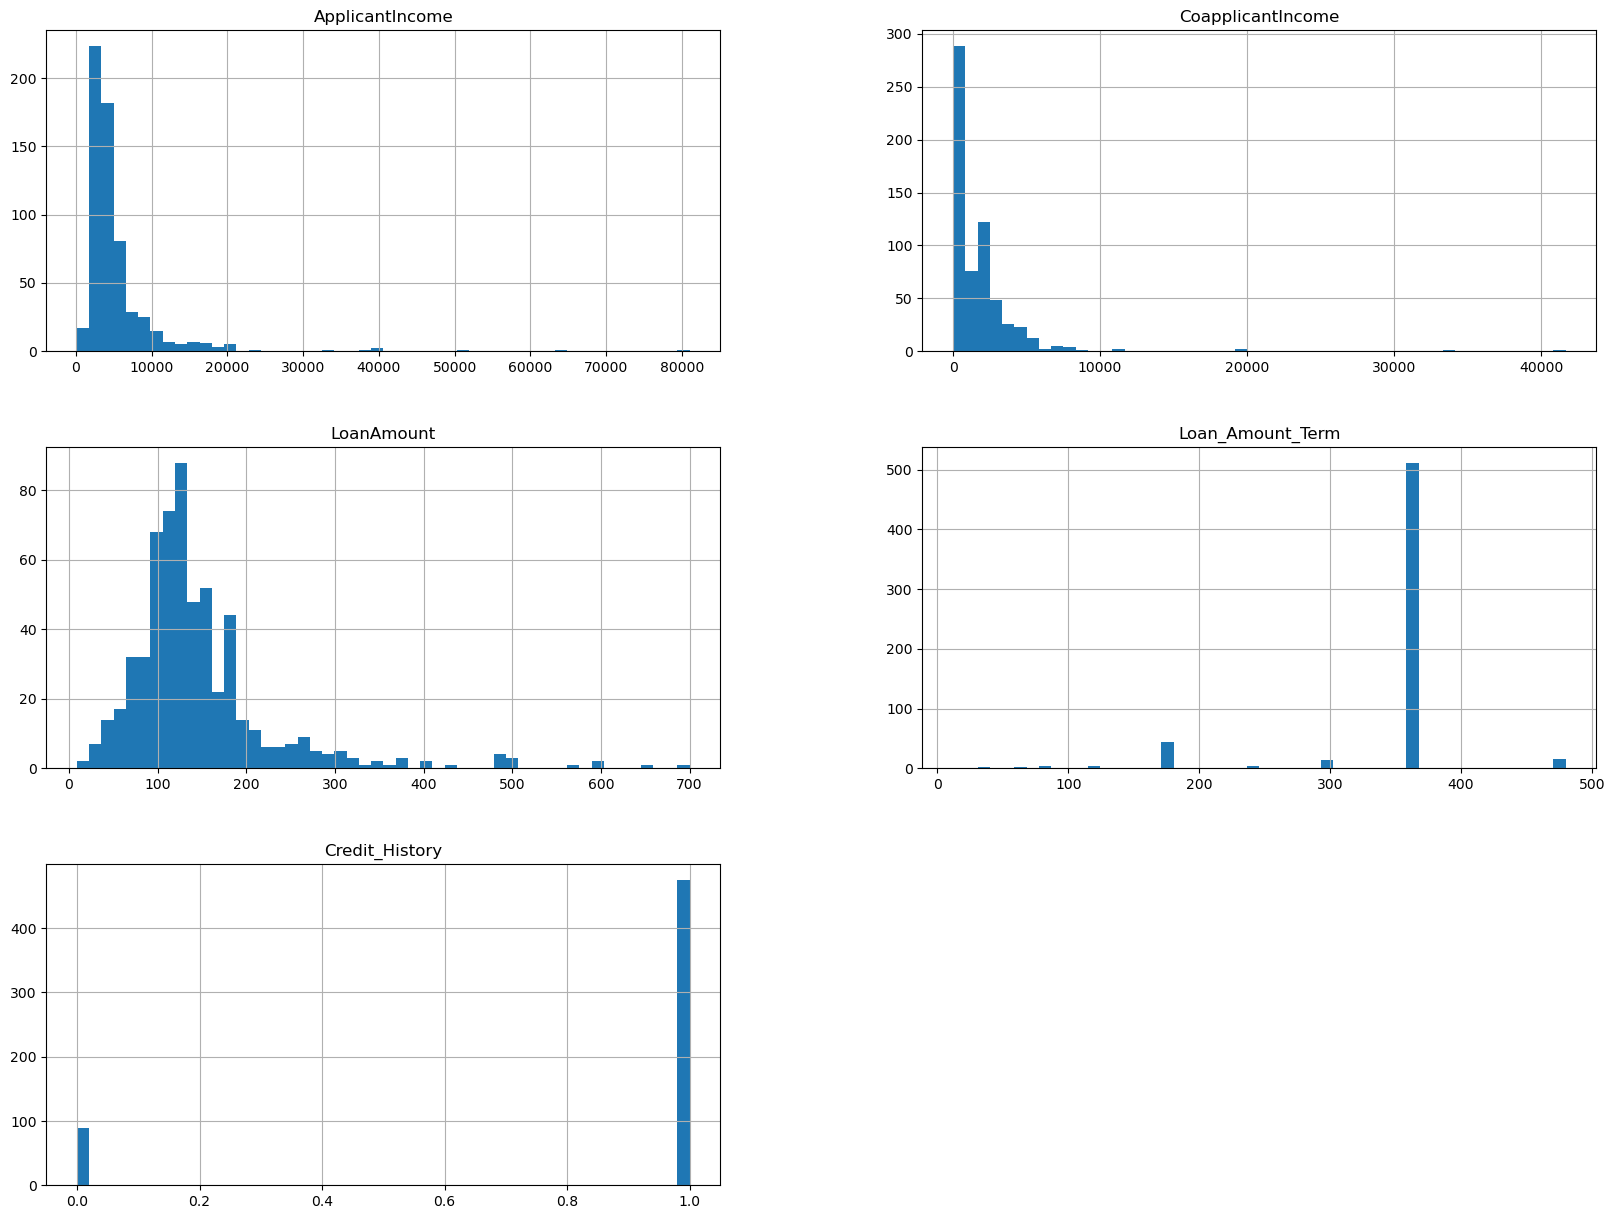

In [18]:
df.hist(bins=50, figsize=(20,15))

In [19]:
df=df.dropna()
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [20]:
df.shape

(480, 13)

Text(0, 0.5, 'Frequency')

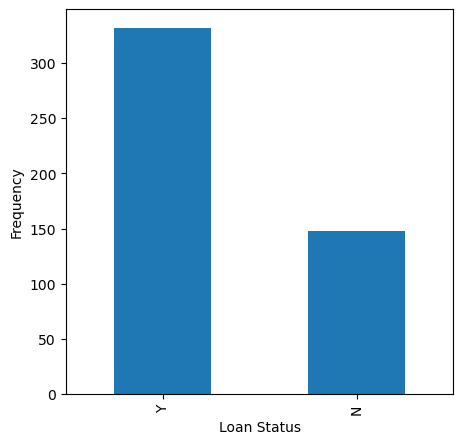

In [21]:
bar = df['Loan_Status'].value_counts().plot(kind='bar', figsize=(5,5))
bar.set_xlabel("Loan Status")
bar.set_ylabel("Frequency")

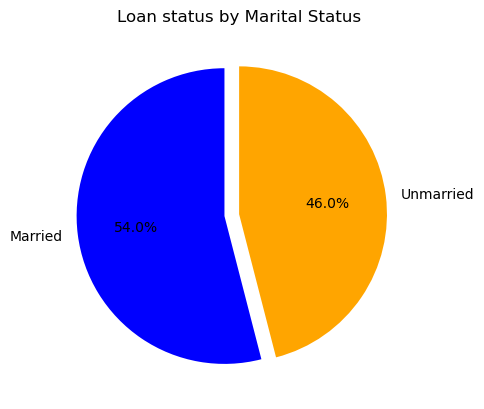

In [22]:
married_loan = df[df["Married"] == "Yes"]["Loan_Status"].value_counts()["Y"]
unmarried_loan = df[df["Married"] == "No"]["Loan_Status"].value_counts()["Y"]
married_loan_perc = married_loan / df["Married"].value_counts()["Yes"] * 100
unmarried_loan_perc = unmarried_loan / df["Married"].value_counts()["No"] * 100
labels = ["Married", "Unmarried"]
sizes = [married_loan_perc, unmarried_loan_perc]
colors = ["blue", "orange"]
explode = (0.1, 0)
fig, am = plt.subplots()
am.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
am.set_title("Loan status by Marital Status")

plt.show()

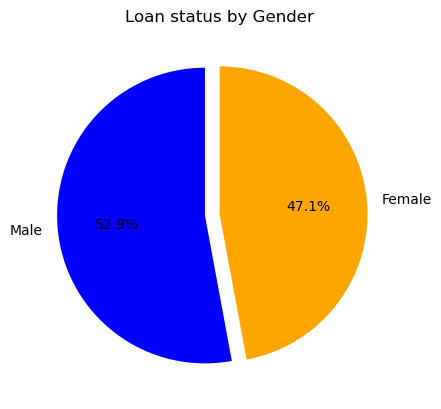

In [23]:
Male_loan = df[df["Gender"] == "Male"]["Loan_Status"].value_counts()["Y"]
Female_loan = df[df["Gender"] == "Female"]["Loan_Status"].value_counts()["Y"]
Male_loan_perc = Male_loan / df["Gender"].value_counts()["Male"] * 100
Female_loan_perc = Female_loan / df["Gender"].value_counts()["Female"] * 100
labels = ["Male", "Female"]
sizes = [Male_loan_perc, Female_loan_perc]
colors = ["blue", "orange"]
explode = (0.1, 0)
fig, ag = plt.subplots()
ag.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ag.set_title("Loan status by Gender")

plt.show()

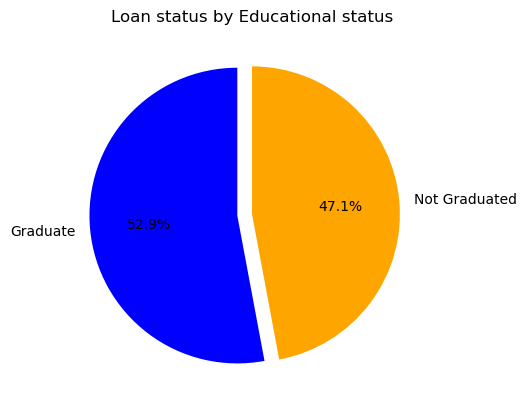

In [24]:
Grad_loan = df[df["Education"] == "Graduate"]["Loan_Status"].value_counts()["Y"]
NonGrad_loan = df[df["Education"] == "Not Graduate"]["Loan_Status"].value_counts()["Y"]
Grad_loan_perc = Grad_loan / df["Education"].value_counts()["Graduate"] * 100
NonGrad_loan_perc = NonGrad_loan / df["Education"].value_counts()["Not Graduate"] * 100
labels = ["Graduate", "Not Graduated"]
sizes = [Grad_loan_perc, NonGrad_loan_perc]
colors = ["blue", "orange"]
explode = (0.1, 0)
fig, ae = plt.subplots()
ae.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ae.set_title("Loan status by Educational status")

plt.show()

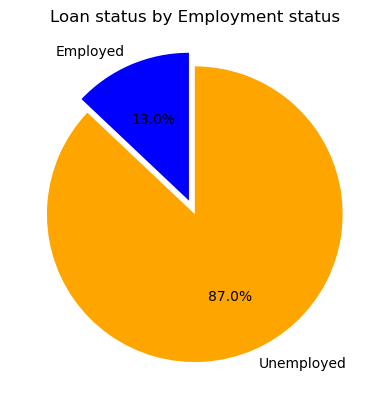

In [25]:
emp_loan = df[df["Self_Employed"] == "Yes"]["Loan_Status"].value_counts()["Y"]
unemp_loan = df[df["Self_Employed"] == "No"]["Loan_Status"].value_counts()["Y"]
emp_loan_perc = emp_loan / df["Self_Employed"].value_counts()["Yes"] * 100
unemp_loan_perc = unemp_loan / df["Self_Employed"].value_counts()["No"] * 100
labels = ["Employed", "Unemployed"]
sizes = [emp_loan, unemp_loan]
colors = ["blue", "orange"]
explode = (0.1, 0)
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.set_title("Loan status by Employment status")

plt.show()

In [26]:
le = LabelEncoder()
cat_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status', 'Property_Area']
for col in df[cat_features]:
    df[col]=le.fit_transform(df[col])

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [27]:
df['Dependents'] = df['Dependents'].replace('3+', 3).astype('int')

In [28]:
temp_df=df.drop("Loan_ID", axis=1)
scale = MinMaxScaler()
names = temp_df.columns

temp2 = scale.fit_transform(temp_df)
norm_df = pd.DataFrame(temp2, columns = names)

In [29]:
norm_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,1.0,0.333333,0.0,0.0,0.054830,0.044567,0.201354,0.72973,1.0,0.0,0.0
1,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.096447,0.72973,1.0,1.0,1.0
2,1.0,1.0,0.000000,1.0,0.0,0.030093,0.069687,0.187817,0.72973,1.0,1.0,1.0
3,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.223350,0.72973,1.0,1.0,1.0
4,1.0,1.0,0.666667,0.0,1.0,0.065145,0.124006,0.436548,0.72973,1.0,1.0,1.0


In [30]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [31]:
inp=norm_df.drop(["Loan_Status"], axis=1) 
targ=norm_df["Loan_Status"]

In [32]:
rfc = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=5)

In [33]:
k=10

cv = StratifiedKFold(n_splits=k, random_state=1, shuffle=True)

scores = cross_val_score(rfc,inp,targ, scoring='accuracy', cv=cv)

print('Accuracy is: %.3f, Standard Deviation is : %.3f' % (np.max(scores)*100, np.std(scores)))

Accuracy is: 83.333, Standard Deviation is : 0.025


In [34]:
scores

array([0.77083333, 0.77083333, 0.83333333, 0.79166667, 0.77083333,
       0.83333333, 0.8125    , 0.8125    , 0.79166667, 0.83333333])